# Project Desription
#### PROBLEM STATEMENT <i>(according to the data provider on Kaggle)</i>     

"The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period."  

**Attribute Information: <i>(according to the data provider on Kaggle)</i>**  
The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.
"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

##### GOAL OF THE PROJECT    

We are required to model the shopper's behavior based on different attribtes, and then predict the outcome of those behavior, on the basis that revenue will be generated or not as a result of that kind of behavior.  

##### DATA SOURCE  
As stated on the data description, source of the data is as follows - 
* C. Okan Sakar 
    Department of Computer Engineering, Faculty of
    Engineering and Natural Sciences, Bahcesehir University,
    34349 Besiktas, Istanbul, Turkey
* Yomi Kastro
    Inveon Information Technologies Consultancy and Trade,
    34335 Istanbul, Turkey
    
* FROM Kaggle -https://www.kaggle.com/roshansharma/online-shoppers-intention  


**Okay so prima facie, lets import some of the libraries we will be needing for this project.**  
(even if we are missing out on some library, we can always import it later on in the project.)

In [2]:
import sys

# library to handle vectorized data 
import numpy as np 

# library for data analsysis and man

import pandas as pd 
# so that the output is not trunacated by pandas when we actually want to see it 
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100000)

# for visualisations
import seaborn as sns

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt


# Loading the data.

In [4]:
data = pd.read_csv('online_shoppers_intention.csv')
data.shape

(12330, 18)

In [6]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [10]:
data.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

# EDA and data cleaning (if required).

Exploring the categorical features in our dataset, that are of data-type > 'object'.

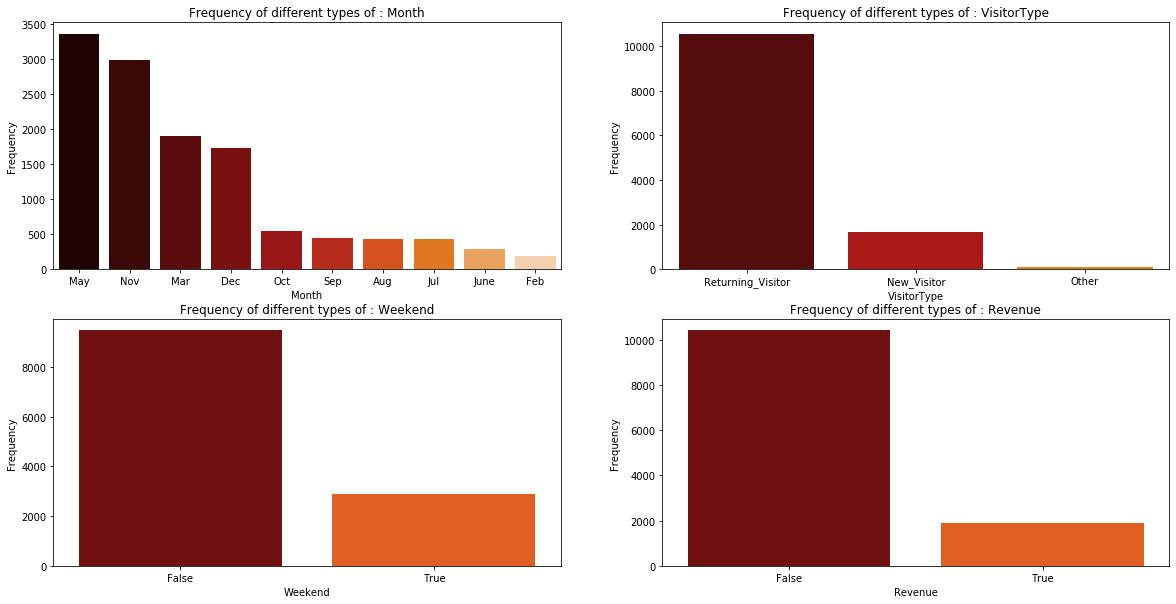

In [12]:
# visualizing the frequency distribution of the various classes in the categorical features ---
catg_features = (data.select_dtypes(include =['object','bool'])).columns
f, axes = plt.subplots(2,2, figsize=(20,10)) 
for feature, x in zip(catg_features, range(len(catg_features))) : 
    sns.barplot(x=data[feature].value_counts().index,
                y=data[feature].value_counts(),
                data=data,
                palette="gist_heat",
                ax=axes.flatten()[x])
    axes.flatten()[x].set_title('Frequency of different types of : {}'.format(feature))
    axes.flatten()[x].set_ylabel("Frequency")
    axes.flatten()[x].set_xlabel("{}".format(feature))

We can see from above that the categorical features 'Month' and 'VisitorType' have 12 and 3 classes in the features respectively; clearly there is not much to do regarding these features in this step. let's move on to explore the numerical features in our dataset.

In [14]:
num_features = data.select_dtypes(include=['float', 'int']).columns
num_features

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')

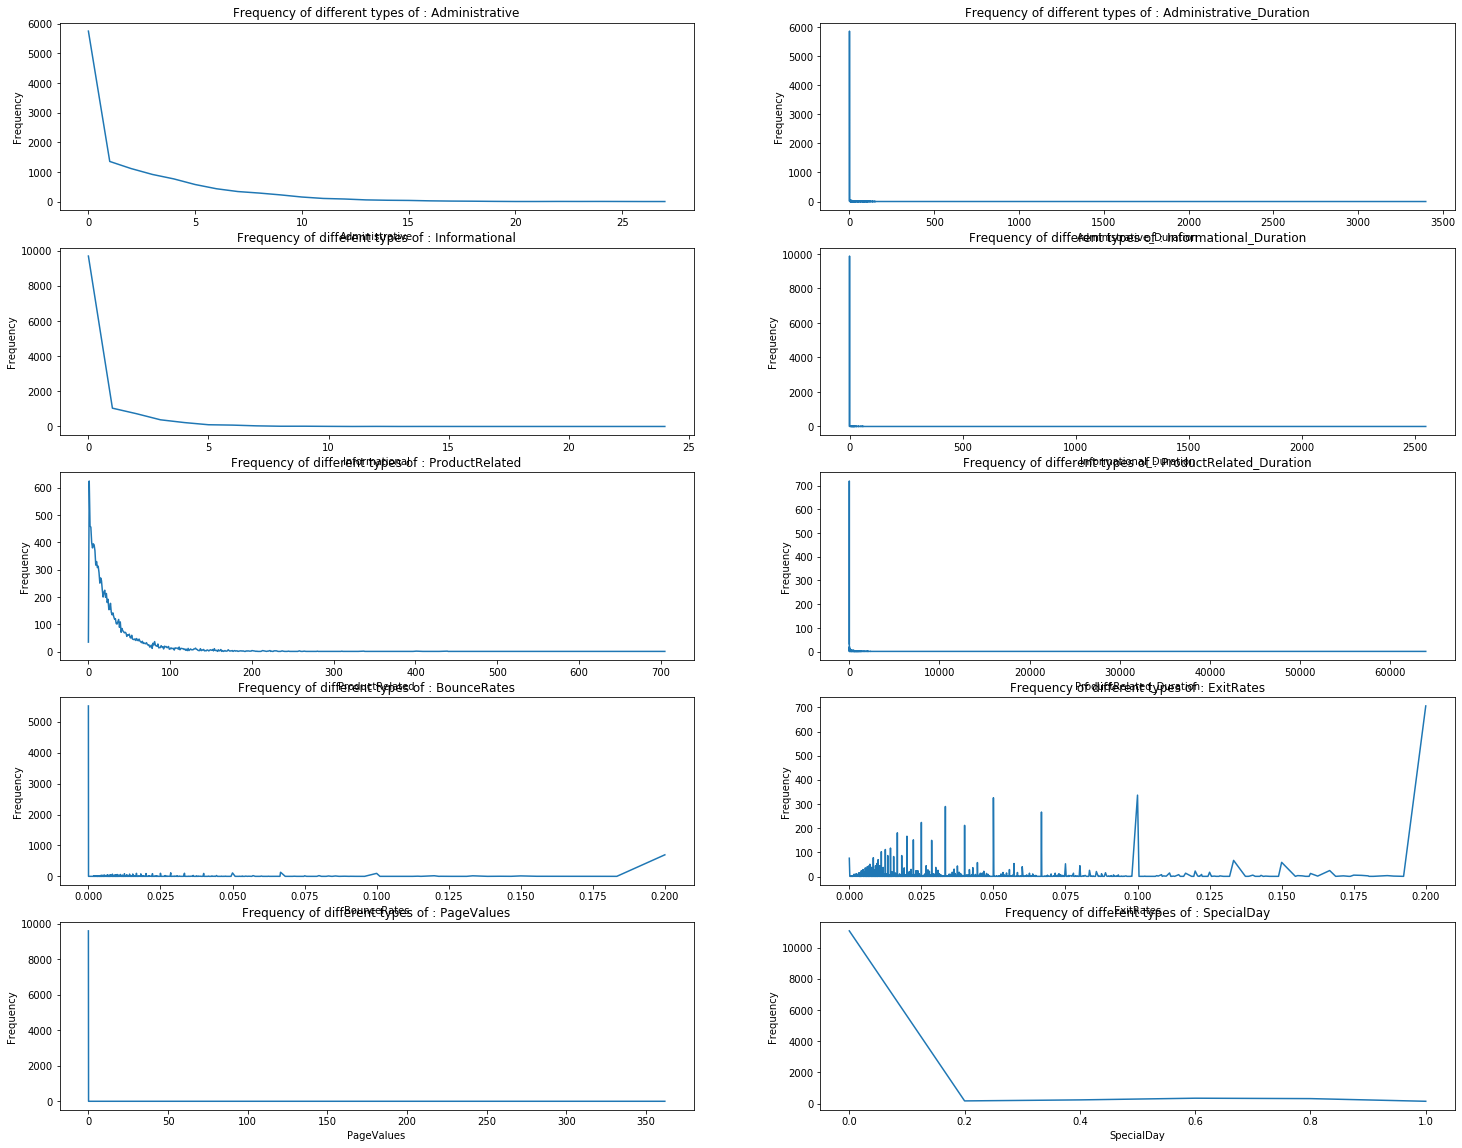

In [16]:
# visualizing the frequency distribution of the numerical features ---
f, axes = plt.subplots(5,2, figsize=(25,20)) 
for feature, x in zip(num_features, range(len(num_features))) : 
    sns.lineplot(x=data[feature].value_counts().index,
                y=data[feature].value_counts(),
                data=data,
                palette="gist_heat",
                ax=axes.flatten()[x])
    axes.flatten()[x].set_title('Frequency of different types of : {}'.format(feature))
    axes.flatten()[x].set_ylabel("Frequency")
    axes.flatten()[x].set_xlabel("{}".format(feature))

# Handling missing values.

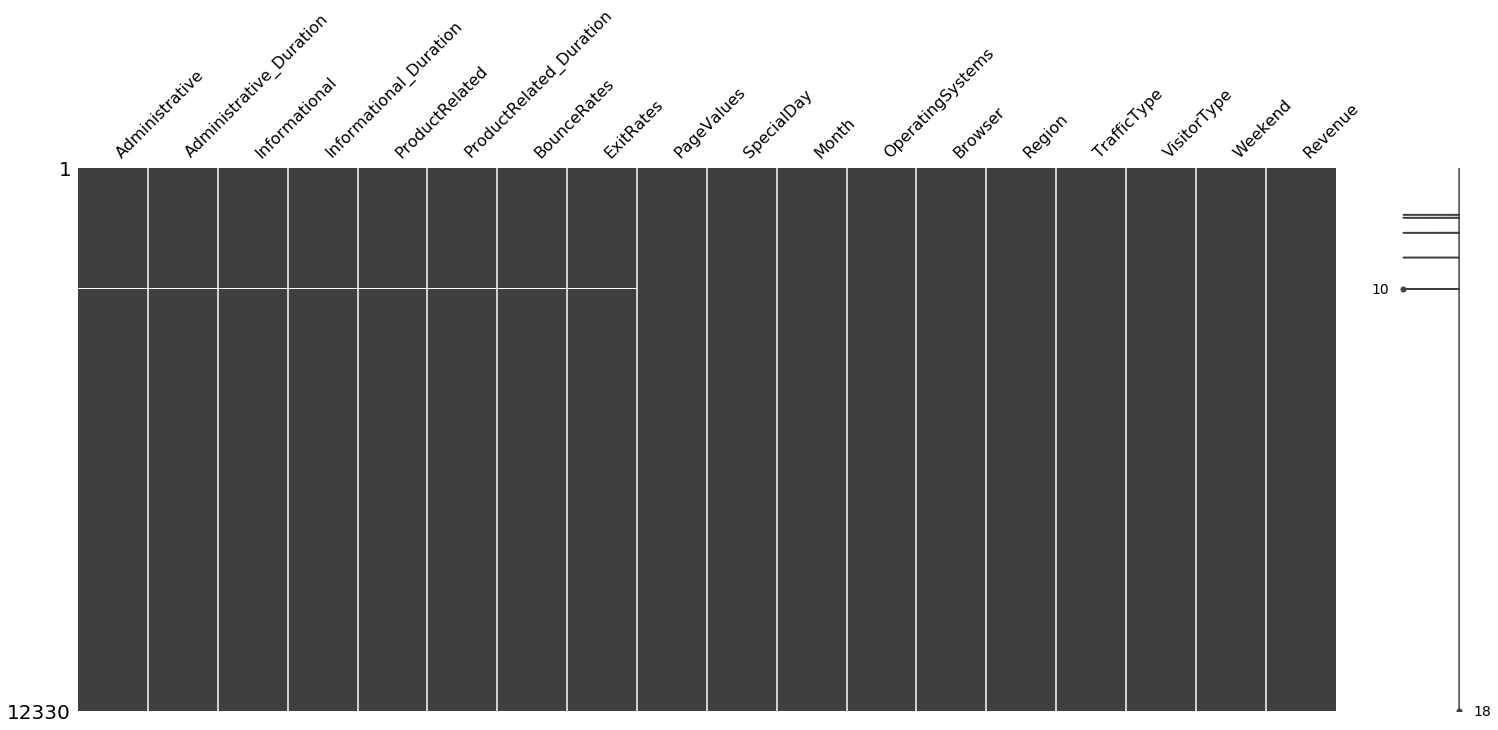

In [18]:
# let's visualize the presence of missing values in our dataset, if any ---
!pip install missingno
import missingno as msno
msno.matrix(data)

As we can see from above we do in fac have missing values in our dataset. Let's identify the features containing missing values and move forward with imputing them as well.

In [20]:
# making an empty list to contain the features which will be identifie as having null values in them ---
features_with_null=[]
for feature in data.columns:
    if data[feature].isnull().sum() != 0 :
        features_with_null.append(feature)
print(features_with_null)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates']


Observations from the above output :  
* These features although being numerical, show a pattern of human behaviour, in terms of responses and stimulii.  
      
    * 'Administrative'  
    * 'Informational'  
    * 'ProductRelated'  
    * 'BounceRates'  
    * 'ExitRates'  


 So the most efficient way of imputing the missing values in thse fatures is by using 'MODE' to replace the null values; due to the fact       that the mode-value will be representing the most-probable response to the given stimulus, defined as a feature in our case.  
    
* These features are basically responses to different stimulii but in terms of time taken to act the response; hence for the case of imputing missing values in these features, the 'MEAN' value will be most optimum in order to prevent informational loss and introduction of unwanted bias.
    * 'ProductRelated_Duration'
    * 'Informational_Duration'
    * 'Administrative_Duration'


In [22]:
import sklearn
from sklearn.impute import SimpleImputer
# mode imptation of null-values ---
for feature in ['Administrative', 'Informational', 'ProductRelated','BounceRates','ExitRates'] :
    data[feature] = SimpleImputer(strategy='most_frequent').fit_transform(data[feature].values.reshape(-1,1))
# mean imputation of null-values ---
for feature in ['ProductRelated_Duration','Informational_Duration','Administrative_Duration'] :
    data[feature] = SimpleImputer(strategy='mean').fit_transform(data[feature].values.reshape(-1,1))


In [24]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Outlier detection and removal.